![bellabeat logo](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRFoQPNBtZytMqV0NFOItlkpuGHiAe31B_Fig&usqp=CAU)
# <font color='#fe8f77'>How Can a Wellness Technology Company Play It Smart?</font> 

# <font color='#fe8f77'>1. Introdução </font>

Esse estudo de caso é uma simulação das tarefas do dia a dia de um analista de dados júnior que trabalha na Bellabeat, uma empresa focada em produzir produtos para saúde feminina. O estudo de caso busca percorrer todo o processo que envolve a análise de dados: as fases da pergunta, o preparo, o processo, a análise, o compartilhamento e o chamado à ação. 

Como resultado entrega-se um relatório com o sumário do problema de negócios, uma descrição de todas as fontes de dados utilizadas na análise, a documentação da análise de dados, um resumo da análise e a recomendação final para a resolução do *case*. 

As fases da análise são:

1. Ask
2. Prepare
3. Process
4. Analyze
5. Share
6. Act

# <font color='#fe8f77'>2. O caso e a pergunta </font>

O cenário apresenta a Bellabeat que, como previamente mencionado, é uma empresa focada em produtos de saúde feminina. É uma empresa pequena, que busca crescimento no mercado principalmente através da venda de wearables fitness. A empresa vende seus produtos globalmente através do e-commerce. 

Nesse sentido, a proposta do case é analisar o dispositivo smart e os dados obtidos dos clientes com o objetivo de derivar insights de como estes clientes estão usando o dispositivo. Com a análise dos hábitos do consumidor seria possível guiar o time de marketing em uma nova estratégia para a companhia. 

**O problema de negócios que busca-se resolver se divide em três perguntas:**

- Quais são as tendências de consumo nos dispositivos inteligentes?
- Como essas tendências estão relacionadas com a base de clientes da Bellabeat?
- Como essas tendências podem ajudar a influenciar a estratégia de marketing da empresa?

# <font color='#fe8f77'>3. Sumário Executivo </font>

- Os participantes do questionário, em média, não cumprem as métricas recomendadas de atividade física diárias: eles não têm 10000 passos diários, tem menos de 30min de momento muito ativos e não dormem o recomendado por noite.

    - **Solução**: Como uma das missões da empresa é garantir o bem estar, poderia-se mostrar pequenos textos reafirmando o quanto é importante ter  uma meta *x* de passos e uma boa noite de sono. Esses textos poderiam ser mostrados com maior ênfase para aqueles que não cumprem as metas básicas de saúde.
    
    
- A maioria das pessoas tem poucos minutos de atividade total, sendo o primeiro quartil da amostra sedentário.

	- **Solução**: a análise das pessoas que se caracterizam como sedentárias poderia abrir espaço para a criação de uma  funcionalidade premium, em que essas pessoas poderiam optar por pagar uma espécie de assinatura para ter informações ainda mais detalhadas e personalizadas sobre como ter uma vida mais ativa.
    
    
- O dispositivo da Bellabeat rastreia qualidade de sono, peso e atividades diárias. Nenhuma dessas funcionalidades é nova no mercado de dispositivos inteligentes. Assim, a melhor estratégia para garantir novos clientes é apostar na diferenciação de seu produto.
	- **Solução**: Focar mais no mercado femino, seu público alvo, oferecendo funcionalidade de rastreio do ciclo menstrual e variações de humor.
    
    
- Há poucos dados únicos, apenas 33 participantes durante um período de um mês. Não há informações sobre dados cruciais como gênero, localização e idade dos clientes. A falta de dados interfere na inferência e na detecção de padrões de consumo.
	- **Solução**: Aumentar o número de observações e o período de análise na coleta de dados.



# <font color='#fe8f77'>4. Prepare </font>

O dataset utilizado será o FitBit Fitness Tracker Data, disponível no [Kaggle](https://www.kaggle.com/datasets/arashnic/fitbit). O dataset é o resultado da aplicação de um questionário feito via Amazon Mechanical Turk entre os dias 12 de abril e 12 de maio, no ano de 2016. Trinta e três usuários elegíveis à pesquisa submeteram seus registros de utilização do aplicativo. Esses registros contêm informações sobre atividade físicas, frequência cardíaca e monitoramento de hábitos de sono. Os dados podem ser encontrados a nível de minutos.  

A database é composta de 18 tabelas, os usuários são identificados por um ID único e possuem um registro de suas atividades por dia, horas e minutos.

A principal tabela de trabalho será a `dailyActivity` que é um merging de várias outras tabelas. Ela contém informações sobre os passos dados, as calorias queimadas, a intensidade dos exercícios etc.

Outra tabela a ser utilizada será a `hourlySteps`, com o único objetivo de saber o número de passos médios que as pessoas dão por hora durante o dia.

Por fim, com o objetivo de fazer uma análise do padrão de sono das pessoas, será utilizada a tabela `sleepDay`, tabela que consiste dos minutos de sono diários registrados no aplicativo.

# <font color='#fe8f77'>5. Process </font>

Nessa fase da análise limparemos as bases e nos asseguraremos que elas sejam precisas, completas, consistentes e verídicas. O cuidado com a integridade dos dados somado a um alinhamento ao objetivo de negócio gera decisões consistentes.

Será feito a importação dos pacotes a serem utilizados, as tabelas trabalhadas, limpeza e a transformação de alguns dados em novas colunas com o objetivo de facilitar a análise. Algum dos processos que serão feitos em cada uma das tabelas utilizadas é: **verificar se os valores estão codificados da maneira correta (data, número, boolean, etc.), se eles não possuem valores discrepantes, checar por dados faltantes, duplicatas, remover variáveis que não serão utilizadas etc.**


In [1]:
#importação das bibliotecas
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sn
pd.set_option('display.max_columns', None)

In [2]:
#importando as bases de dados
daily_activity = pd.read_csv("C:/Users/SAMSUNG/OneDrive/Documentos/data_science/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
heart_rate= pd.read_csv("C:/Users/SAMSUNG/OneDrive/Documentos/data_science/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
sleep_day = pd.read_csv("C:/Users/SAMSUNG/OneDrive/Documentos/data_science/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight = pd.read_csv("C:/Users/SAMSUNG/OneDrive/Documentos/data_science/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
hourly_steps = pd.read_csv("C:/Users/SAMSUNG/OneDrive/Documentos/data_science/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")


# subset apenas com as colunas que serão utilizadas 

daily_activity = daily_activity[['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']]

weight = weight[['Id', 'Date', 'WeightKg', 'BMI']]

### <font color='#fe8f77'> Dados ausentes e duplicatas </font>

In [3]:
# daily_activity valores ausentes
daily_activity.isna().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [4]:
# daily_activity duplicatas
daily_activity.duplicated().sum()

0

In [5]:
# heart_rate valores ausentes
heart_rate.isna().sum()

Id       0
Time     0
Value    0
dtype: int64

In [6]:
# heart_rate duplicatas
heart_rate.duplicated().sum()

0

In [7]:
#sleep_day valores ausentes
sleep_day.isna().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [8]:
#sleep_day duplicatas
sleep_day.duplicated().sum()

3

In [9]:
#dropando duplicatas
sleep_day = sleep_day.drop_duplicates()

In [10]:
#weight valores ausentes
weight.isna().sum()


Id          0
Date        0
WeightKg    0
BMI         0
dtype: int64

In [11]:
#weight duplicatas
daily_activity.duplicated().sum()

0

Não temos nenhum dado ausente em nenhuma das tabelas sendo utilizadas. Apenas a tabela de `sleep_day` possuía duplicatas.

###  <font color='#fe8f77'> Tratando casting incorretos </font>

As tabelas possuem dois problemas de casting: a variável `Id` está codificada como int64 deveria ser string, visto que é apenas um código de identificação, e não um número. Além disso, as variáveis de data em todas as tabelas estão codificadas como `object` e devem ser convertidas para datetime:


In [12]:
daily_activity['Id'] = daily_activity['Id'].map(str)
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])

heart_rate['Id'] = heart_rate['Id'].map(str)
heart_rate['Time'] = pd.to_datetime(heart_rate['Time'], format= '%m/%d/%Y %I:%M:%S %p')

sleep_day['Id'] = sleep_day['Id'].map(str)
sleep_day['SleepDay'] = pd.to_datetime(sleep_day['SleepDay'], format = '%m/%d/%Y %I:%M:%S %p')

weight['Id'] = weight['Id'].map(str)
weight['Date'] = pd.to_datetime(weight['Date'], format = '%m/%d/%Y %I:%M:%S %p')

hourly_steps['Id'] = hourly_steps['Id'].map(str)
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])

###  <font color='#fe8f77'> Criando colunas </font>

Iremos fazer algumas transformações nos dados para facilitar a análise e derivar insights, sendo elas:

 - Criar variáveis identificando o dia da semana em que o registro foi feito e se é fim de semana ou não para as tabelas de `daily_activity`, `heart_rate` e `sleep_day`.
 
Para a tabela de `daily_activity` iremos:

 - Criar uma coluna com o número de horas de utilização da pulseira
 - Criar um coluna com o total de minutos ativos que a pessoa teve durante o dia
 - Criar duas colunas: uma que indica se a pessoa usou a pulseira e outra que indica se ela não usou.
 
Para a tabela de `sleep_day` faremos as seguintes conversões:

  - Duas colunas novas, com a conversão dos minutos dormidos e acordados para horas.
  - A criação de uma coluna para saber quantos minutos foram passados na cama despertos.
  - Duas novas colunas baseadas em critérios de latência do sono e eficiência do sono.


####  a. Dia da semana e fim de semana


In [13]:
#criando coluna com os dias da semana
daily_activity['DayWeek'] = daily_activity['ActivityDate'].dt.day_name()

heart_rate['DayWeek'] = heart_rate['Time'].dt.day_name()

sleep_day['DayWeek'] = sleep_day['SleepDay'].dt.day_name()

#criando coluna para saber se é final de semana ou não
daily_activity['IsWeekend'] = daily_activity['ActivityDate'].dt.day_name().isin(['Saturday', 'Sunday'])

heart_rate['IsWeekend'] = heart_rate['Time'].dt.day_name().isin(['Saturday', 'Sunday'])

sleep_day['IsWeekend'] = sleep_day['SleepDay'].dt.day_name().isin(['Saturday', 'Sunday'])

#reorganizando a ordem das colunas no dataset

#daily_activity
daily_activity = daily_activity.copy()
cols = daily_activity.columns.tolist()
cols =cols[0:2] + cols[-2:] + cols[2:-2]
daily_activity = daily_activity[cols]

#heart_rate
cols = heart_rate.columns.tolist()
cols =cols[0:2] + cols[-2:] + cols[2:-2]
heart_rate = heart_rate[cols]

#sleep_day
cols = sleep_day.columns.tolist()
cols =cols[0:2] + cols[-2:] + cols[2:-2]
sleep_day = sleep_day[cols]


#### b. Criando uma coluna para saber o número de horas utilizando a pulseira

É possível que os resultados estejam um pouco viesados a depender do quanto cada indivíduo está usando a pulseira. Por exemplo, quem está no primeiro quartil tem registros mais baixos de atividade física por se movimentar pouco ou por usar durante menos tempo a pulseira? Quem está no terceiro quartil está lá por passar mais tempo com a pulseira e assim ter mais registros ou por de fato se exercitar mais?

Para sanar essa curiosidade, iremos criar mais uma coluna `HourlyWear`, com a soma dos minutos das colunas `VeryActiveMinutes`, `FairlyActiveMinutes`, `LightlyActiveMinutes` e `SedentaryMinutes`, tudo isso dividido por 60, para termos o resultado final em horas:


In [14]:
daily_activity['HourlyWear'] = ((daily_activity['VeryActiveMinutes'] + daily_activity['FairlyActiveMinutes'] +  
                                daily_activity['LightlyActiveMinutes'] + daily_activity['SedentaryMinutes'])/60)

#### c. Minutos ativos

De maneira similar ao passo anterior, iremos somar as colunas `VeryActiveMinutes`, `FairlyActiveMinutes`, `LightlyActiveMinutes` para saber quantos minutos totais o indivíduo teve de atividade diária:


In [15]:
daily_activity['TotalActiveMinutes'] = daily_activity['VeryActiveMinutes'] + daily_activity['FairlyActiveMinutes'] + daily_activity['LightlyActiveMinutes']
daily_activity['TotalActiveHours'] = daily_activity['TotalActiveMinutes']/60
daily_activity['SedentaryHours'] = daily_activity['SedentaryMinutes']/60

#### d. Dias de registros e dias sem registro de atividades

O objetivo aqui é saber quantos dias as pessoas utilizam a pulseira. Para saber isso iremos criar mais uma coluna de valores verdadeiro/falso. O critério de decisão para saber se a pessoa utilizou a pulseira ou não é se ela tem algum registro de passos dados (TotalSteps). Logicamente, se houver 0 passos dados, podemos assumir que a pessoa não usou a pulseira.


In [16]:
daily_activity['WornBand'] = np.where(daily_activity['TotalSteps'] != 0, True, False)

daily_activity['DintWornBand'] = np.where(daily_activity['TotalSteps'] == 0, True, False)

#### e. Convertendo os minutos dormidos para horas

In [17]:
sleep_day['TotalHoursAsleep'] = sleep_day['TotalMinutesAsleep']/60
sleep_day['TotalHoursInBed'] = sleep_day['TotalTimeInBed']/60

#### f. Minutos acordado na cama
A diferença entre `TotalTimeinBed` e `TotalMinutesAsleep` me dá quanto tempo a pessoa fica na cama sem estar dormindo:

In [18]:
sleep_day['TotalTimeBedAwake'] = sleep_day['TotalTimeInBed'].sub(sleep_day['TotalMinutesAsleep'], axis = 0)

#### g. Critérios de qualidade de sono: latência e eficiência

Um dos critérios para avaliar uma boa noite de sono é a [**latência do sono**](https://persono.com.br/insights/sono-e-ciencia/latencia-do-sono). A latência do sono diz que não se deve levar mais de meia hora para dormir.

A tecnologia pode nos ajudar a monitorar nossos padrões de sono para saber esses números. Os dados fornecidos pela empresa nos dão uma ideia das horas em que o usuário passa acordado na cama e as horas dormindo.

Os dados não fornecem informação sobre *quando* (em que minuto) o usuário cai no sono, assim não é possível saber se os minutos em que ele está na cama e não está dormindo é depois de acordar ou por ter problemas para dormir. Portanto, irei fazer uma extrapolação e assumir que esses minutos são o tempo que o usuário demora para pegar no sono, assim podemos criar uma coluna de latência.

- A coluna `SleepLatency` será uma coluna booleana e irá indicar True se a pessoa demorou menos de 30min para dormir (tendo padrões considerados saudáveis) e False caso contrário.

[Mais sobre latência do sono](https://www.sleepfoundation.org/how-sleep-works/sleep-latency)


In [19]:
sleep_day['SleepLatency'] = np.where(sleep_day['TotalTimeBedAwake'] <= 30 , True, False)

Outro critério de qualidade de sono é a **eficiência**. Uma boa noite de sono indica que 85% do tempo na cama foi passado dormindo:

In [20]:
sleep_day['SleepEfficiency'] = np.where((sleep_day['TotalMinutesAsleep'] >= 0.85 * sleep_day['TotalTimeInBed']), True, False)

# <font color='#fe8f77'>6. Analyze and share </font>

Com a base de dados devidamente limpa e transformada, podemos começar a analisar os padrões de uso do aplicativo. As principais tabelas a serem utilizadas são a de `daily_steps` e `sleep_day`. A tabela de `heart_rate` e `weight`serão usadas de maneira pontual. Também será feito o merging entre as tabelas de `daily_steps` e `sleep_day`, o objetivo aqui é ver se é possível encontrar alguma correlação entre uma vida mais ativa e qualidade do sono.


## <font color='#fe8f77'>Quais funcionalidades do app os clientes mais usaram?</font>

Os dados que a empresa nos fornece trazem informações sobre as atividade diárias, o registro de calorias diárias, de passos dados diariamente, de batimentos cardíacos por minuto, passos dados por hora, registro de sono e o registro de peso. Os dados em relação a passos dados, atividades diárias e calorias são todos dados em uma única tabela final, por isso considero eles como sendo uma única funcionalidade principal.

No total, há 33 participantes que responderam o questionário num intervalo de um mês.


In [21]:
print(daily_activity.Id.unique().size, 'usaram as funcionalidades de passos diários, calorias e atividades.')
print(heart_rate.Id.unique().size, 'usaram a funcionalidade de registrar batimentos cardiácos.')
print(sleep_day.Id.unique().size, 'usaram a funcionalidade de registrar minutos de sono.')
print(weight.Id.unique().size, 'usaram a funcionalidade de registrar o peso.')

33 usaram as funcionalidades de passos diários, calorias e atividades.
14 usaram a funcionalidade de registrar batimentos cardiácos.
24 usaram a funcionalidade de registrar minutos de sono.
8 usaram a funcionalidade de registrar o peso.


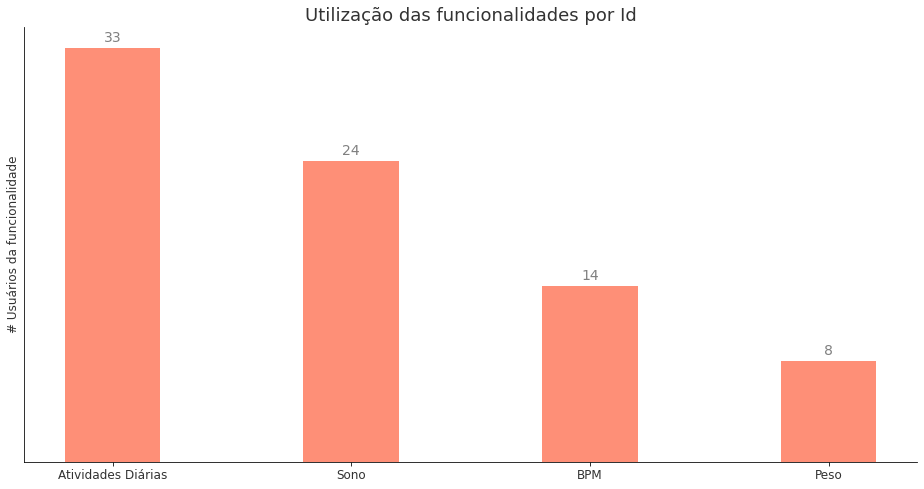

In [22]:
df = pd.DataFrame({'Atividades':daily_activity.Id.unique().size, 
                  'BPM' : heart_rate.Id.unique().size,
                  'Sono': sleep_day.Id.unique().size,
                  'Peso': weight.Id.unique().size},
                 index = ['Usuários'] )

df = df.T
df = df.reset_index()
df = df.sort_values(by = 'Usuários', ascending= False)

#gráfico
fig = plt.figure(figsize = (16, 8))

bars = plt.bar(df['index'], df['Usuários'], color = '#fe8f77', width = 0.4, align='center')

plt.title('Utilização das funcionalidades por Id', size = 18, alpha = 0.8)
labels = ['Atividades Diárias', 'Sono', 'BPM', 'Peso']
plt.ylabel('# Usuários da funcionalidade', size = 12, alpha = 0.8)

plt.xticks(df['index'], labels, alpha = 0.8, size = 12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.yticks([])

for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, str(int(bar.get_height())), 
                 ha='center', color='gray', fontsize=14)
plt.show()

Por ter tão poucas pessoas que usaram a funcionalidade de registrar o peso (menos da metade dos questionados), preferi optar por não analisá-la. Ainda assim, como o principal objetivo da pulseira é monitorar padrões de atividade física para ajudar o cliente a compreender seus hábitos e melhorar o bem estar, seria interessante investir em incentivos para que ele registre mais suas flutuações de peso e batimentos cardíacos.

A análise de quantas pessoas estão usando cada funcionalidade parece indicar que os cliente estão interessados na pulseira para registrar principalmente sua movimentação durante o dia e seus padrões de sono.


## <font color='#fe8f77'>Tabela: Daily_activies </font>

### <font color='#F27E9E'>Estatísticas gerais do dataset</font>

In [23]:
daily_activity[['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']].describe()

,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,7637.910638,5.489702,21.164894,13.564894,192.812766,991.210638,2303.609574
std,5087.150742,3.924606,32.844803,19.987404,109.174700,301.267437,718.166862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3789.750000,2.620000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,7405.500000,5.245000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,10727.000000,7.712500,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,36019.000000,28.030001,210.000000,143.000000,518.000000,1440.000000,4900.000000


A grande maioria das autoridades de saúde indicam que o ideal para uma vida saudável é que se caminhe 10.000 passos por dia. Segundo reportagem da [BBC](https://www.bbc.com/portuguese/geral-63624788), a caminhada no curto prazo favorece a liberação de endorfina no cérebro, aumentando o sentimento de bem estar. A caminhada também trás como benefícios um coração mais forte e a eliminação de calorias.

[Outras fontes](https://www.10000steps.org.au/articles/healthy-lifestyles/counting-steps/) estabelecem que uma pessoa sedentária caminha menos que 5.000 passos por dia, uma pessoa pouco ativa caminhas entre 5.000 e 7.499 passos, uma pessoa um tanto quanto ativa caminha por volta de 7.500 a 9.999 passos por dia, uma pessoa ativa caminha mais que 10.000 passos e uma pessoa muito ativa caminha mais de 12.500 passos diariamente.

- Os usuários caminham, em média, 7637 passos e percorrem por volta de 5km diariamente. Isso é menos do que a recomendação ideal dos 10.000 passos e coloca a amostra como pessoas pouco ativas.

- O primeiro quartil tem média de 3789 passos (o que os caracteriza como sedentários) e percorrem por volta de 2.6 km diários. Esse quartil se caracteriza por fazer apenas atividades leves, com 127 min em média dedicados a se movimentar. Seus minutos sedentários são 729 (12 horas).

- O terceiro quartil (as pessoas mais ativas) percorrem 10.727, com distância percorrida de  por volta de 7.7 km. Eles têm 34 minutos diários muito ativos, 19 min moderadamente ativos e 264 minutos com atividades leves. Seus minutos de tempo sedentário são 1229 (20 horas).


### <font color='#F27E9E'>Média de passos por dia</font>

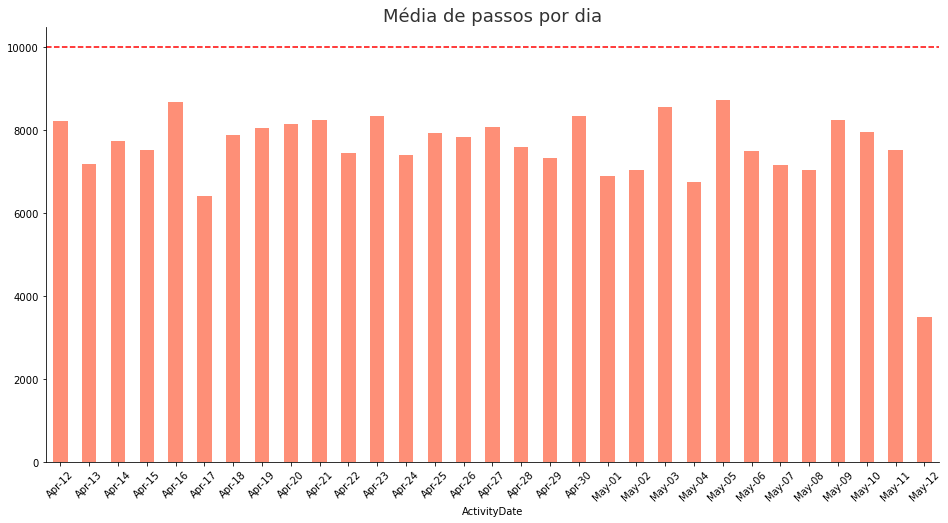

In [24]:
(daily_activity.groupby(daily_activity['ActivityDate'].dt.strftime('%b-%d'))['TotalSteps'].mean()
 .plot(kind= 'bar', rot = 45, figsize = (16,8), color = '#fe8f77'))
plt.axhline(y=10000,linewidth=1.5, color='red', linestyle = '--')
plt.title('Média de passos por dia', size = 18, alpha = 0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

- Os usuários caminham, em média, 7637 passos e percorrem por volta de 5km diariamente. Isso é menos do que a recomendação ideal dos 10.000 passos.
- Em nenhum dos 30 dias em que a pesquisa foi aplicada, a média de passos chegou ao ideal de 10.000 passos.


### <font color='#F27E9E'>Média de passos por dia da semana</font>

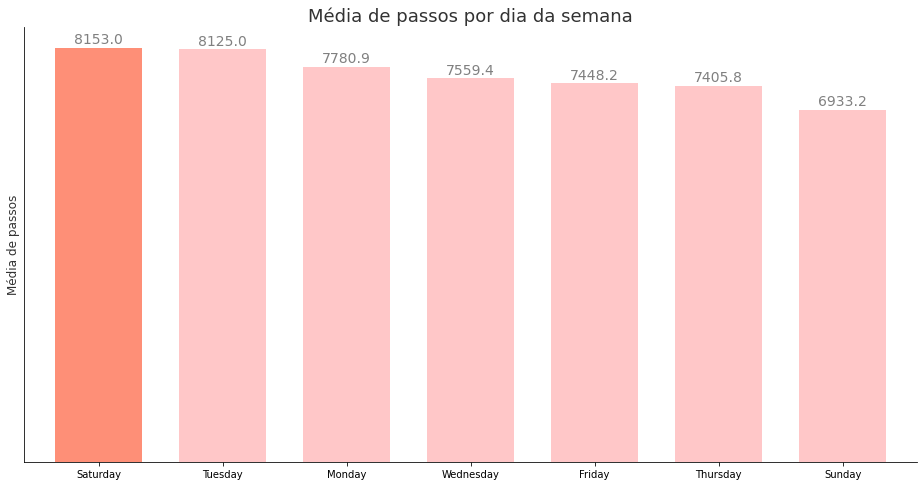

In [25]:
activity_grp_week = daily_activity.groupby(daily_activity['DayWeek'])['TotalSteps'].mean().sort_values(ascending = False)

ax = (activity_grp_week.plot(kind= 'bar', rot = 0, figsize = (16,8), 
                             color =['#fe8f77', '#ffc7c8', '#ffc7c8',
                                    '#ffc7c8', '#ffc7c8', '#ffc7c8',
                                    '#ffc7c8'],width = 0.7, xlabel = ''))
fig = ax.get_figure()
fig.set_size_inches(16,8)
plt.title('Média de passos por dia da semana', size = 18, alpha = 0.8)
plt.yticks([])
plt.ylabel('Média de passos', size = 12, alpha = 0.8)


#dejunking

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = +1
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            color = 'gray',
            size = 14)                      


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.show()

O dia da semana que as pessoas mais se movimentam é aos Sábados, com uma média de passos de 8153, e o dia com menos movimentação é Domingo, com 6933 passos em média. Durante a semana, o dia em que as pessoas têm maior média de passos é às Terças Feiras.

### <font color='#F27E9E'>Média de minutos ativos e sedentário por dia da semana</font>

In [26]:
daily_activity.groupby(['DayWeek']).agg({
    'VeryActiveMinutes': np.nanmean,
    'FairlyActiveMinutes': np.nanmean,
    'LightlyActiveMinutes': np.nanmean,
    'SedentaryMinutes': np.nanmean,
    'TotalActiveMinutes': np.nanmean
}).sort_values(by = 'VeryActiveMinutes', ascending=False)

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalActiveMinutes
DayWeek,,,,,
Monday,23.108333,14.000000,192.058333,1027.941667,229.166667
Tuesday,22.953947,14.335526,197.342105,1007.361842,234.631579
Saturday,21.919355,15.201613,207.145161,964.282258,244.266129
Wednesday,20.780000,13.100000,189.853333,989.480000,223.733333
Friday,20.055556,12.111111,204.198413,1000.309524,236.365079
Sunday,19.983471,14.528926,173.975207,990.256198,208.487603
Thursday,19.408163,11.959184,185.421769,961.993197,216.789116


In [27]:
active_minutes_week = daily_activity.groupby(['DayWeek']).agg({
    'VeryActiveMinutes': np.nanmean,
    'FairlyActiveMinutes': np.nanmean,
    'LightlyActiveMinutes': np.nanmean,
    'SedentaryMinutes': np.nanmean,
    'TotalActiveMinutes': np.nanmean
}).sort_values(by = 'VeryActiveMinutes', ascending=True)

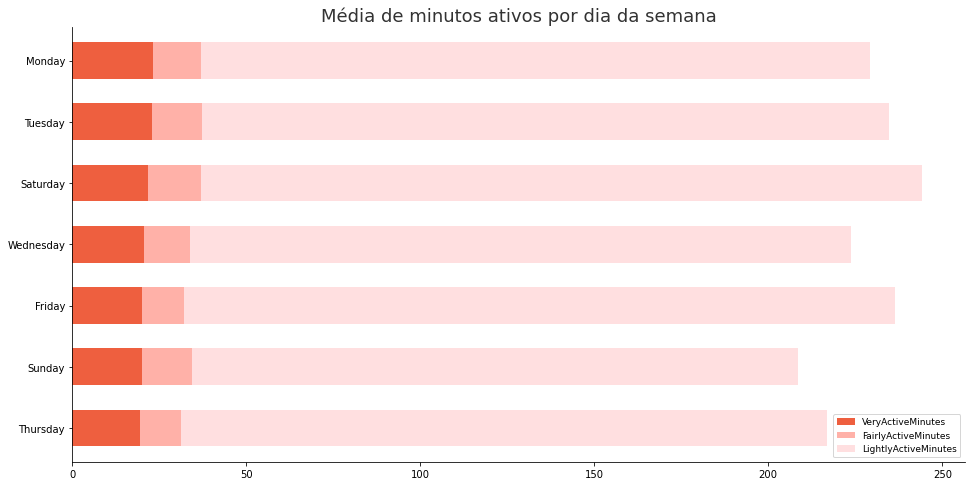

In [28]:
ax = (active_minutes_week[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']]
 .plot(kind= 'barh', stacked= 'true', rot = 0, figsize = (16,8), color = ['#EE5F3F','#FFB1A8','#FFDFE0'], width =  0.6))


plt.title("Média de minutos ativos por dia da semana", alpha = 0.8, size = 18)
ax.set_ylabel('')

plt.legend(loc = 4,frameon=True, fontsize= 9)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

Como podemos observar tanto no gráfico, quanto na tabela, sábado também é o dia com maior registro de minutos de atividade leve: 207 min. Elas caminham menos aos domingos, com apenas 6.933 passos, em média. É importante notar que, embora o dia com a maior média de passos seja sábado, esse não é o dia com maior média de minutos muito ativos: esse dia é a Segunda-Feira, com 23 minutos de atividade nessa categoria.

### <font color='#F27E9E'>Movimentação na semana vs final de semana</font>

In [29]:
daily_activity.groupby(['IsWeekend']).agg({
    'TotalSteps': np.nanmean,
    'TotalDistance' : np.nanmean,
    'VeryActiveMinutes': np.nanmean,
    'FairlyActiveMinutes': np.nanmean,
    'LightlyActiveMinutes': np.nanmean,
    'SedentaryMinutes': np.nanmean,
}).sort_values(by = 'TotalSteps', ascending=False)

,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
IsWeekend,,,,,,
False,7668.699281,5.505108,21.235971,13.105036,193.535252,996.181295
True,7550.571429,5.446000,20.963265,14.869388,190.763265,977.110204


As pessoas têm uma média de passos levemente maior nos dias da semana. De maneira geral, a população da amostra é mais ativas durante a semana, entretanto a média dos valores não difere muito entre fim de semana ou não. 


In [30]:
#mediana
daily_activity.groupby(['IsWeekend']).agg({
    'TotalSteps': np.median,
    'TotalDistance' : np.median,
    'VeryActiveMinutes': np.median,
    'FairlyActiveMinutes': np.median,
    'LightlyActiveMinutes': np.median,
    'SedentaryMinutes': np.median,
}).sort_values(by = 'TotalSteps', ascending=False)

,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
IsWeekend,,,,,,
False,7802.0,5.40,5.0,7.0,199.0,1057.0
True,6708.0,4.59,2.0,3.0,199.0,1068.0


Quando olhamos a mediana, temos que as pessoas dão mais de 1000 passos diários a mais na semana do que ao fim de semana (7802 na semana vs 6708 no fim de semana). Todos os outros indicadores de atividade também indicam que as pessoas tendem a se movimentar mais durante a semana do que aos fins de semana. Esse número é particularmente diferente quando vemos minutos muito ativos: é 7 na semana, caindo para 3 aos fins de semana.

### <font color='#F27E9E'>Média de minutos ativos: categoria de intensidade ao longo do período analisado</font>


Relembrando as reportagens, ambas as fontes reafirmam que é necessário ao menos 30 minutos de atividade moderada para levar uma vida com maior qualidade. Segundo nossa tabela podemos perceber que:


- Os usuários também falham em ter ao menos 30 minutos de atividade física, obtendo apenas 21 min de atividade física intensa. 

Podemos ver isso de maneira ainda mais clara através de gráficos:


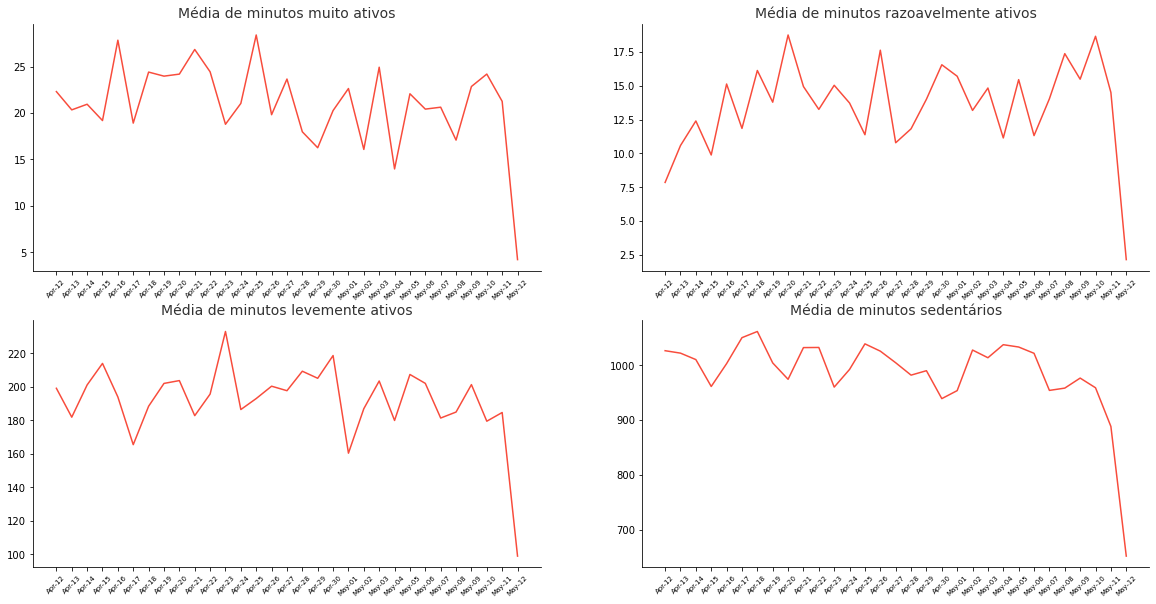

In [31]:
#organizando o dataset
activity_grp_day = daily_activity.groupby(daily_activity['ActivityDate'].dt.strftime('%b-%d')).mean()
activity_grp_day.reset_index(level=0, inplace = True)

#gráfico
fig = plt.figure(figsize = (20, 10))
plt.subplot(2, 2, 1)
plt.title('Média de minutos muito ativos', size = 14, alpha = 0.8)
plt.plot(activity_grp_day['ActivityDate'], activity_grp_day['VeryActiveMinutes'], color = '#F84C3C')
plt.xticks(rotation=45, size = 7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(2, 2, 2)
plt.plot(activity_grp_day['ActivityDate'], activity_grp_day['FairlyActiveMinutes'], color = '#F84C3C')
plt.xticks(rotation=45, size = 7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Média de minutos razoavelmente ativos', size = 14, alpha = 0.8)


plt.subplot(2, 2, 3)
plt.plot(activity_grp_day['ActivityDate'], activity_grp_day['LightlyActiveMinutes'], color = '#F84C3C')
plt.xticks(rotation=45, size = 7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Média de minutos levemente ativos', size = 14, alpha = 0.8)

plt.subplot(2, 2, 4)
plt.plot(activity_grp_day['ActivityDate'], activity_grp_day['SedentaryMinutes'], color = '#F84C3C')
plt.xticks(rotation=45, size = 7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Média de minutos sedentários', size = 14, alpha = 0.8)

plt.show()

Com os gráficos trazendo a média de movimento durante todo o período da pesquisa, podemos ver claramente que a média de minutos muito ativos ou razoavelmente ativos de todos os participantes não chegou a 30 min em nenhum do dia. De fato, boa parte dos registros são de minutos levemente ativos.


### <font color='#F27E9E'>Média de horas ativas vs sedentária</font>

Outra medida que podemos ver de comparação é a média de horas ativos (a soma das colunas de minutos muito ativos, moderadamente ativos e levemente ativos) comparado com as horas sedentárias:

In [32]:
daily_activity[['TotalActiveHours', 'SedentaryHours']].describe()

,TotalActiveHours,SedentaryHours
count,940.000000,940.000000
mean,3.792376,16.520177
std,2.029605,5.021124
min,0.000000,0.000000
25%,2.445833,12.162500
50%,4.116667,17.625000
75%,5.287500,20.491667
max,9.200000,24.000000


As pessoas da amostra passam, em média, apenas 3 horas do seu dia se movimentando contra 16 horas paradas. Mesmo que assumamos que todos dormem por volta de 8 horas por dia, ainda assim seriam poucos minutos caminhando.

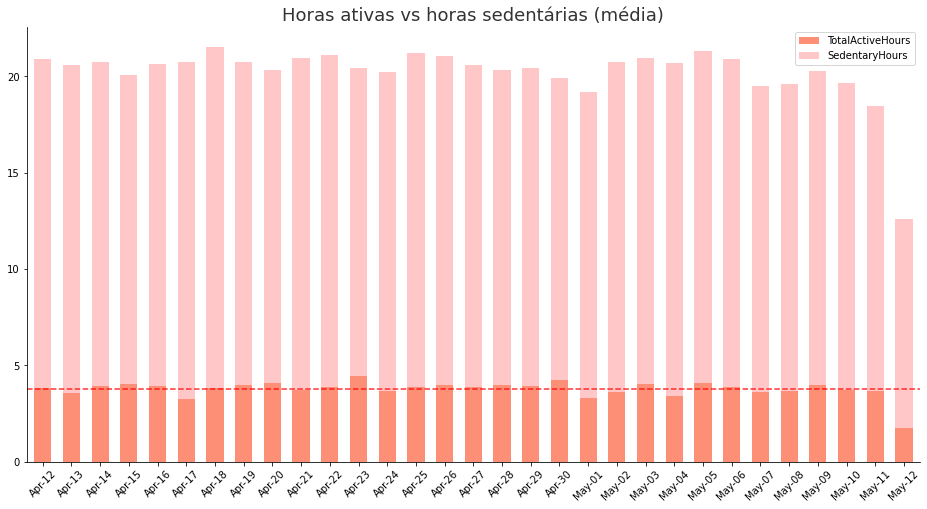

In [33]:
(daily_activity.groupby(daily_activity['ActivityDate'].dt.strftime('%b-%d'))[['TotalActiveHours', 'SedentaryHours']].mean()
.plot(kind= 'bar', stacked= 'true', rot = 45, figsize = (16,8), color = ['#fe8f77', '#ffc7c8'], width =  0.6, xlabel = ''))

plt.title('Horas ativas vs horas sedentárias (média)', size = 18, alpha = 0.8)
plt.axhline(y=3.792376,linewidth=1.5, color='red', linestyle = '--', alpha = 0.8)



plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

- A linha vermelha aqui é a média de horas ativas, podemos ver claramente que são poucos os dias em que as pessoas se movimentam mais que a média.

### <font color='#F27E9E'>Horas com a pulseira no braço</font>

Na maior parte dos casos, os clientes fazem atividades leves. O terceiro quartil tem mais minutos sedentários, mas talvez isso se explique porque eles usam a pulseira durante mais horas do que as pessoas do primeiro quartil e têm mais registros. 
Ainda assim, é possível que os resultados estejam viesados: Quem está no primeiro quartil tem poucos registros de atividade físicas por se movimentar pouco ou por usar por pouco tempo a pulseira? Quem está no terceiro quartil está lá por passar mais tempo com a pulseira e, assim, ter mais registos ou por de facto ter mais minutos ativos? Embora a análise por quartil nos mostre que os números de minutos sedentários não são muito díspares (principalmente do segundo quartil em diante), ainda assim seria interessante checar a quantidade de minutos totais de registro da pulseira.

*Obs: a título de recordação, a coluna `HourlyWear` foi criada através da soma dos minutos das colunas `VeryActiveMinutes`, `FairlyActiveMinutes`, `LightlyActiveMinutes` e `SedentaryMinutes`, tudo isso dividido por 60, para termos o resultado final em horas*


In [34]:
daily_activity[['TotalSteps','HourlyWear']].describe()

,TotalSteps,HourlyWear
count,940.000000,940.000000
mean,7637.910638,20.312553
std,5087.150742,4.432196
min,0.000000,0.033333
25%,3789.750000,16.495833
50%,7405.500000,24.000000
75%,10727.000000,24.000000
max,36019.000000,24.000000


As pessoas usam a pulseira por volta de 20 horas por dia. Na análise entre os quartis as pessoas do primeiro quartil (que menos tem registro de atividade) usam menos a pulseira: elas utilizam por 16 horas, em contraste com as 24 horas registradas a partir do segundo quartil. Visualizando em gráfico:

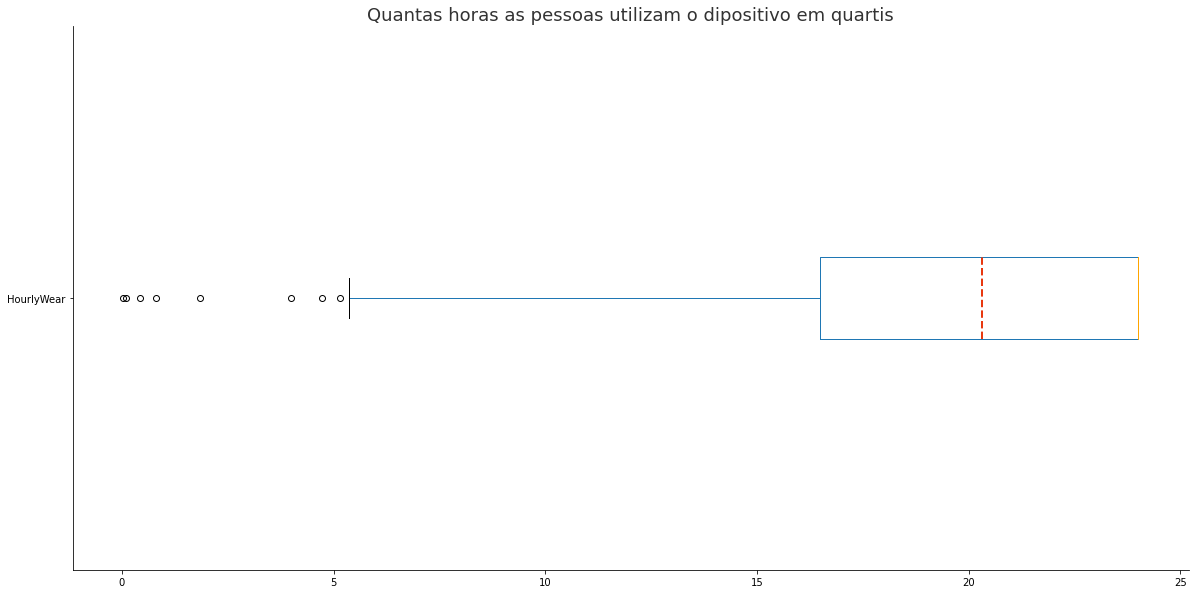

In [35]:
ax = (daily_activity.
      boxplot(column = ['HourlyWear'], figsize=(20,10), rot=0, grid=False, vert=False, meanline=True, showmeans=True,
             medianprops=dict(color='orange'), meanprops = dict(color = '#E83810', linewidth=2)))
plt.title("Quantas horas as pessoas utilizam o dipositivo em quartis", size = 18, alpha = 0.8)
ax.set_ylabel('')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

### <font color='#F27E9E'>Hora do dia com mais atividade</font>

Por fim, para encerrar com as estatísticas gerais da tabela de atividades gerais veremos a hora do dia em que as pessoas são mais ativas:

In [36]:
hourly_steps.set_index('ActivityHour', inplace = True)
heart_rate.set_index('Time', inplace = True)

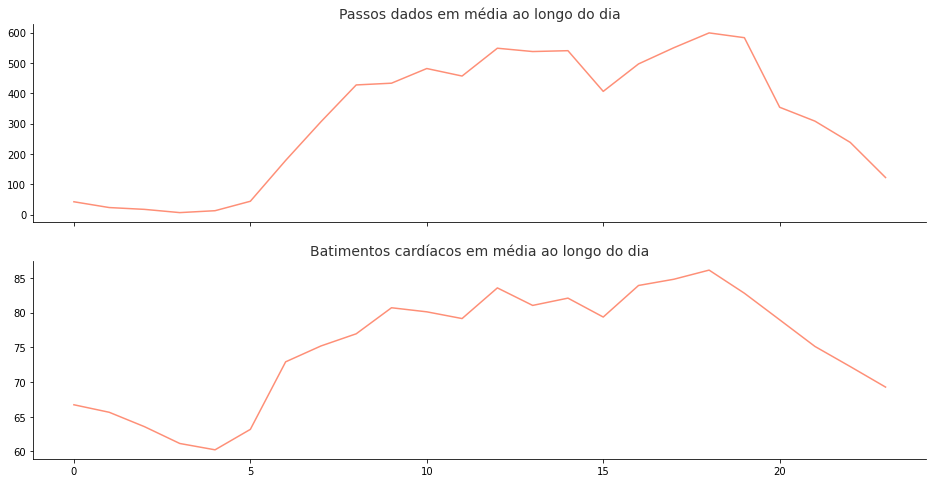

In [37]:
fig = plt.figure(figsize = (16, 8))

plt.subplot(2, 1, 1)
hsteps = hourly_steps['StepTotal'].groupby([hourly_steps.index.hour]).mean().plot(kind = 'line', figsize = (16,8), color = '#fe8f77', rot = 0, xlabel = '')
plt.title('Passos dados em média ao longo do dia', size = 14, alpha = 0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(2, 1, 2, sharex = hsteps)
heart_rate['Value'].groupby([heart_rate.index.hour]).mean().plot(kind = 'line', figsize = (16,8), color = '#fe8f77', rot = 0, xlabel = '')
plt.title('Batimentos cardíacos em média ao longo do dia', size = 14, alpha = 0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

Podemos observar claramente que as pessoas se movimentam mais durante as 17h-19h, tanto por terem maior contagem de passos quanto por terem maior taxa de batimento cardíaco.

## <font color='#fe8f77'>Tabela: sleep_day </font>

In [38]:
sleep_day.head()

,Id,SleepDay,DayWeek,IsWeekend,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep,TotalHoursInBed,TotalTimeBedAwake,SleepLatency,SleepEfficiency
0,1503960366,2016-04-12,Tuesday,False,1,327,346,5.450000,5.766667,19,True,True
1,1503960366,2016-04-13,Wednesday,False,2,384,407,6.400000,6.783333,23,True,True
2,1503960366,2016-04-15,Friday,False,1,412,442,6.866667,7.366667,30,True,True
3,1503960366,2016-04-16,Saturday,True,2,340,367,5.666667,6.116667,27,True,True
4,1503960366,2016-04-17,Sunday,True,1,700,712,11.666667,11.866667,12,True,True


In [39]:
sleep_day[['TotalHoursAsleep', 'TotalHoursInBed', 'TotalTimeBedAwake',]].describe()

,TotalHoursAsleep,TotalHoursInBed,TotalTimeBedAwake
count,410.000000,410.000000,410.000000
mean,6.986220,7.641382,39.309756
std,1.977265,2.124252,46.710932
min,0.966667,1.016667,0.000000
25%,6.016667,6.729167,17.000000
50%,7.208333,7.716667,25.500000
75%,8.166667,8.766667,40.000000
max,13.266667,16.016667,371.000000


Dos usuários que registraram suas horas de sono:

- Eles dormem, em média, 6 horas por noite, mas ficam em torno de 7 horas na cama. Havendo um intervalo médio de 39 minutos em que essas pessoas estão na cama despertas. A mediana das pessoas dorme por volta de 7 horas por noite, mas apenas o percentil 75% acima dorme 8 horas por dia ou mais.
- As pessoas que dormem mais também tem mais horas na cama, e passam 40 minutos na cama enquanto estão despertos.


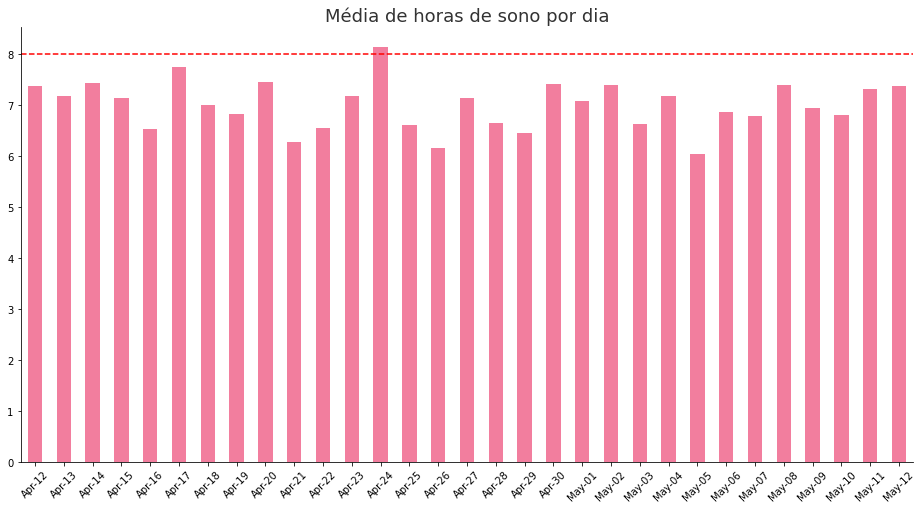

In [40]:
axs = (sleep_day.groupby(sleep_day['SleepDay'].dt.strftime('%b-%d'))['TotalHoursAsleep'].mean()
     .plot(kind= 'bar', rot = 45, figsize = (16,8), color = '#F27E9E', xlabel = ''))
plt.title('Média de horas de sono por dia', size = 18, alpha = 0.8)
plt.axhline(y= 8, linewidth=1.5, color='red', linestyle = '--')


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

Se levarmos em consideração que a média de horas de sono considerada ideal é 8 horas, em apenas um dia essa meta foi cumprida.


### <font color='#F27E9E'>Minutos dormindo vs minutos acordados na cama em média</font>

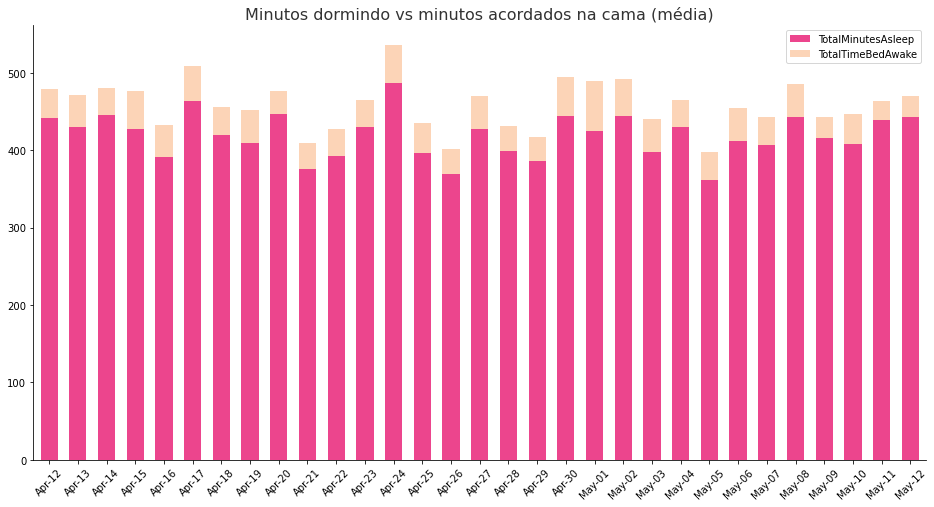

In [41]:


((sleep_day.groupby(sleep_day['SleepDay'].dt.strftime('%b-%d')))[['TotalMinutesAsleep', 'TotalTimeBedAwake']].mean()
.plot(kind= 'bar', stacked= 'true', rot = 45, figsize = (16,8), color = ['#EC458D', '#FCD4B7'], width =  0.6, xlabel = ''))

plt.title('Minutos dormindo vs minutos acordados na cama (média)', size = 16, alpha = 0.8)



plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

### <font color='#F27E9E'>Mediana de horas de sono por dia da semana</font>

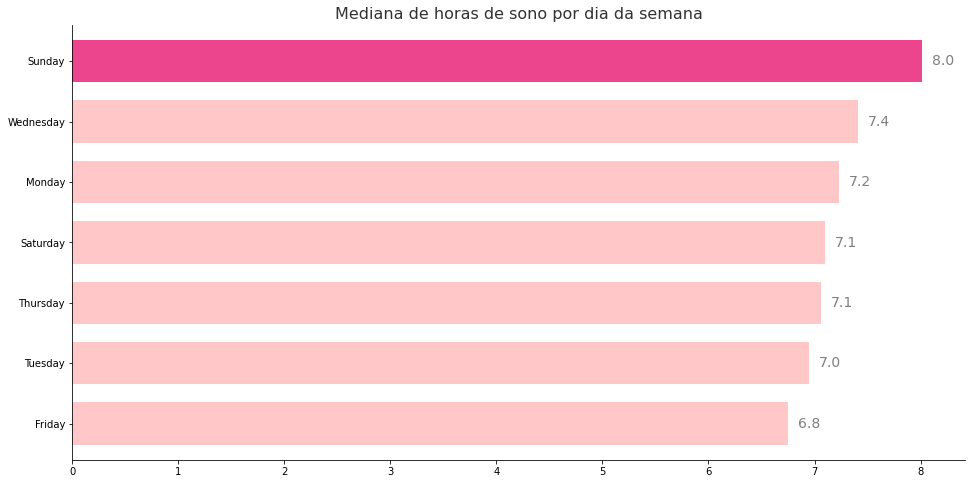

In [42]:
ax = ((sleep_day.groupby(sleep_day['DayWeek'])['TotalHoursAsleep']).median().sort_values(ascending = True)
.plot(kind = 'barh', color =['#ffc7c8', '#ffc7c8', '#ffc7c8','#ffc7c8', '#ffc7c8', '#ffc7c8', '#EC458D'], width = 0.7, 
      xlabel = '', figsize = (16,8), align='center'))

plt.title('Mediana de horas de sono por dia da semana', size = 16, alpha = 0.8)


#dejunking

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 10
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,
        color = 'gray',
            size = 14)                      
plt.show()

Como estamos trabalhando com menos observações neste dataset (apenas 24 pessoas registraram seus padrões de sono), iremos trabalhar com a mediana de maneira a evitar que a  análise seja viesada por valores extremos. A mediana representa o valor do meio de uma lista de dados e é menos influenciada por valores muito altos ou muito baixos.

Como podemos ver no gráfico acima, apenas aos domingos que os participantes dormiram 8 horas de sono. O dia em que se registra menor mediana de sono é sexta-feira, com o valor de 6.7 horas.


### <font color='#F27E9E'>Em quantos dias as pessoas registraram seus perídos de sono?</font>

Outra medida básica que podemos calcular é quantos dias as pessoas registraram seus padrões de sono. Como o período da pesquisa foi de um mês, dividi - de forma arbitrária -  os usuários nas seguintes categorias:

- Usa muito: tem mais de 16 dias de registro de sono.
- Usa moderadamente: tem registro de sono entre 10 e 15 dias.
- Usa pouco: Usou menos de 10 dias do período analisado a função de sono.


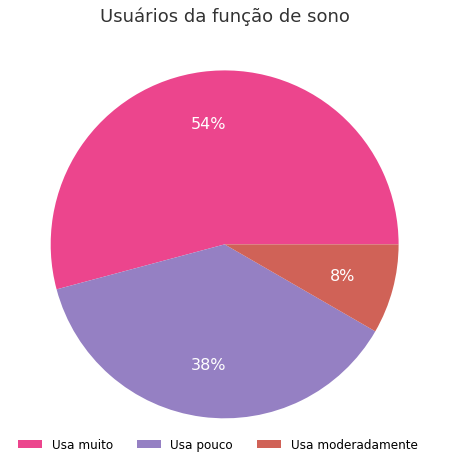

In [43]:
#contruindo o df de uso
sleep_use = pd.DataFrame(sleep_day['Id'].value_counts()).reset_index().rename(columns={'index': 'id', 'Id':'days_use'})


sleep_use.loc[sleep_use['days_use'] > 16, 'sleep_use'] = 'Usa muito'
sleep_use.loc[(sleep_use['days_use'] > 10) & (sleep_use['days_use'] <= 15), 'sleep_use'] = 'Usa moderadamente'
sleep_use.loc[(sleep_use['days_use'] <= 10), 'sleep_use'] = 'Usa pouco'

#o gráfico
colors = ['#EC458D', '#9580C3', '#D06257']

(sleep_use['sleep_use'].value_counts().plot.pie(autopct='%1.0f%%', ylabel= '',
                                                figsize = (16,8), legend=True, labeldistance=None, 
                                                textprops={'fontsize': 16, 'color':'white'},
                                                pctdistance = 0.7, colors = colors))
plt.title("Usuários da função de sono", alpha = 0.8, size = 18)
ax.set_ylabel('')

plt.legend(loc = 3,frameon= False, fontsize= 12, ncol=3)
plt.show()

Então temos que, das 24 pessoas que registraram seus padrões de sono, 57% tem um uso considerável da funcionalidade (mais de 16 dias dos mês de dados coletados), 9% usa moderadamente (utilizando entre 10 e 15 dias dos 31 dias) e 35% usa pouco a funcionalidade (usou menos que 10 dias).

Considerando o quanto padrões de sono regulares são importantes para o bem estar, essa é uma função que poderia ser mais utilizada.




### <font color='#F27E9E'>Critérios de qualidade de sono</font>

Por fim, iremos analisar critérios de qualidade de sono: quantos da amostra tiveram latência de sono (menos de 30min para cair no sono) e quantos tiveram eficiência de sono (85% do tempo na cama foi passado dormindo).

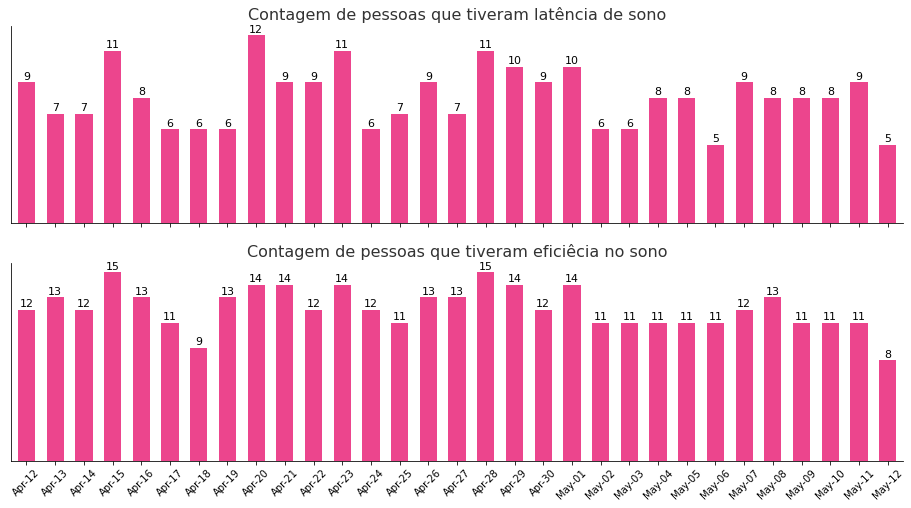

In [44]:
fig = plt.figure(figsize = (20, 10))

plt.subplot(2, 1, 1)
ax = (sleep_day.groupby(sleep_day['SleepDay'].dt.strftime('%b-%d'))['SleepLatency'].sum().
plot(kind= 'bar', rot = 45, figsize = (16,8), color = '#EC458D', xlabel = '', width = 0.6))
plt.title('Contagem de pessoas que tiveram latência de sono', size = 16, alpha = 0.8)
plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.subplot(2, 1, 2, sharex = ax)
ax2 = (sleep_day.groupby(sleep_day['SleepDay'].dt.strftime('%b-%d'))['SleepEfficiency'].sum().
plot(kind= 'bar', rot = 45, figsize = (16,8), color = '#EC458D', xlabel = '', width = 0.6))
plt.title('Contagem de pessoas que tiveram eficiêcia no sono', size = 16, alpha = 0.8)
plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = +1
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            color = 'black',
            size = 11)                      # Vertically align label differently for
                                        # positive and negative values.

add_value_labels(ax)
add_value_labels(ax2)

plt.show()

## <font color='#fe8f77'>Merging: sleep_day e daily_activity</font>

Essa etapa consistirá de juntar os datasets de sleep_table e daily_activity baseado nos IDs dos participantes em busca de alguma correlação entre o nível de atividade registrada e os padrões de sono.

In [45]:
### Merging

#renomeano coluna de SleepDay para que haja consistencia entre os dois datasets que planejamos juntar
sleep_day.rename(columns={'SleepDay' : 'ActivityDate'}, inplace=True)

#Dropando colunas duplicatas no sleep_day
sleep_day.drop(columns = ['DayWeek', 'IsWeekend', 'TotalSleepRecords'], inplace = True)

sleep_activities = pd.merge(daily_activity, sleep_day, how = 'inner', on = ['Id', 'ActivityDate'])

In [46]:
sleep_activities[['TotalSteps','VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories','TotalMinutesAsleep', 'TotalTimeInBed', 'TotalTimeBedAwake', 'SleepLatency', 'SleepEfficiency']].describe()

,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesAsleep,TotalTimeInBed,TotalTimeBedAwake
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,8514.909756,25.046341,17.924390,216.541463,712.100000,2389.295122,419.173171,458.482927,39.309756
std,4157.375584,36.218237,22.418593,86.705299,166.179395,758.435040,118.635918,127.455140,46.710932
min,17.000000,0.000000,0.000000,2.000000,0.000000,257.000000,58.000000,61.000000,0.000000
25%,5188.750000,0.000000,0.000000,158.000000,631.250000,1841.000000,361.000000,403.750000,17.000000
50%,8913.000000,9.000000,11.000000,208.000000,717.000000,2207.000000,432.500000,463.000000,25.500000
75%,11370.250000,38.000000,26.750000,263.000000,782.750000,2920.000000,490.000000,526.000000,40.000000
max,22770.000000,210.000000,143.000000,518.000000,1265.000000,4900.000000,796.000000,961.000000,371.000000


- Temos 410 observações nessa análise.

In [47]:
corr = sleep_activities[['TotalSteps','VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories','TotalMinutesAsleep', 'TotalTimeInBed', 'TotalTimeBedAwake']]

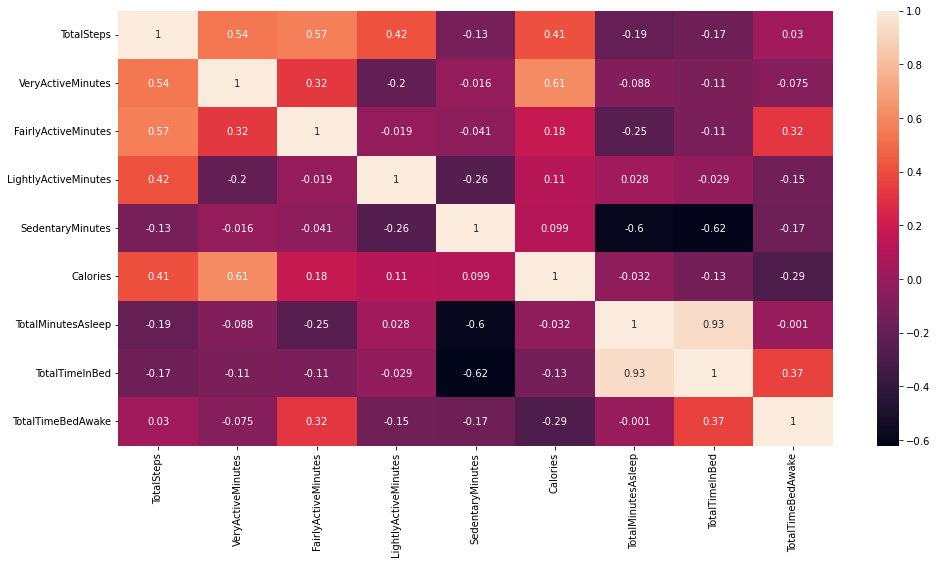

In [48]:
corr_matrix = corr.corr()
fig, ax = plt.subplots(figsize=(16,8))
sn.heatmap(corr_matrix, annot=True, ax = ax)
plt.show()

- Minutos muito ativos está positivamente correlacionado com o nível de calorias perdidas (0.61)
- Minutos sedentários está negativamente correlacionado com com o total de minutos dormindo e minutos na cama (-0.6).

De maneira geral, as horas de sono parecem estar pouco relacionadas com as atividade físicas feitas durante o dia. Não há nada que indique que mais minutos ativos levem a alguma melhora do sono na amostra, embora parece haver alguma correlação entre minutos sedentários e horas de sono (pessoas que têm mais minutos sedentários dormem menos). Além disso, parece haver alguma correlação entre atividades mais intensas e perda de calorias.

É importante ressaltar que a amostra é razoavelmente pequena e os dados coletados são de uma pequena janela de tempo. Seria necessário mais dados durante mais períodos para de fato inferir alguma relação entre as variáveis.

Em gráficos temos:


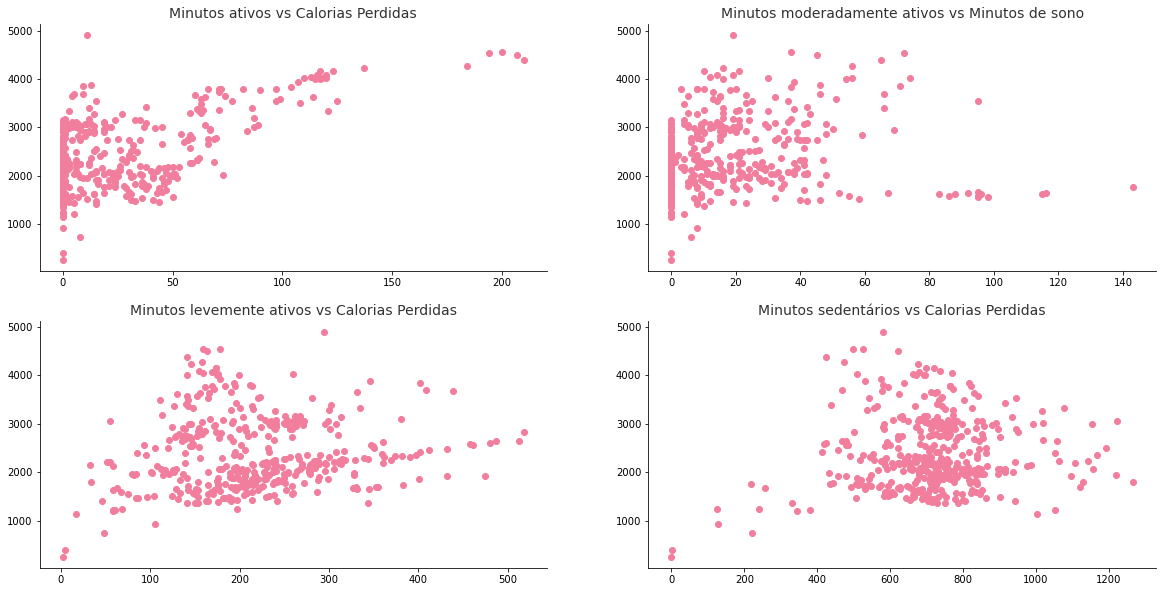

In [49]:
fig = plt.figure(figsize = (20, 10))

plt.subplot(2, 2, 1)
plt.scatter(corr['VeryActiveMinutes'], corr['Calories'], color = '#F27E9E')
plt.title('Minutos ativos vs Calorias Perdidas', size = 14, alpha = 0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(2, 2, 2)
plt.scatter(corr['FairlyActiveMinutes'], corr['Calories'], color = '#F27E9E')
plt.title('Minutos moderadamente ativos vs Minutos de sono', size = 14, alpha = 0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(2, 2, 3)
plt.scatter(corr['LightlyActiveMinutes'], corr['Calories'], color = '#F27E9E')
plt.title('Minutos levemente ativos vs Calorias Perdidas', size = 14, alpha = 0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(2, 2, 4)
plt.scatter(corr['SedentaryMinutes'], corr['Calories'], color = '#F27E9E')
plt.title('Minutos sedentários vs Calorias Perdidas', size = 14, alpha = 0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

- Podemos ver claramante através dos gráficos de dispersão que a única variável que parece estar um tanto quanto relacionada com calorias é a variável de minutos ativos.

Quanto ao sono temos que:

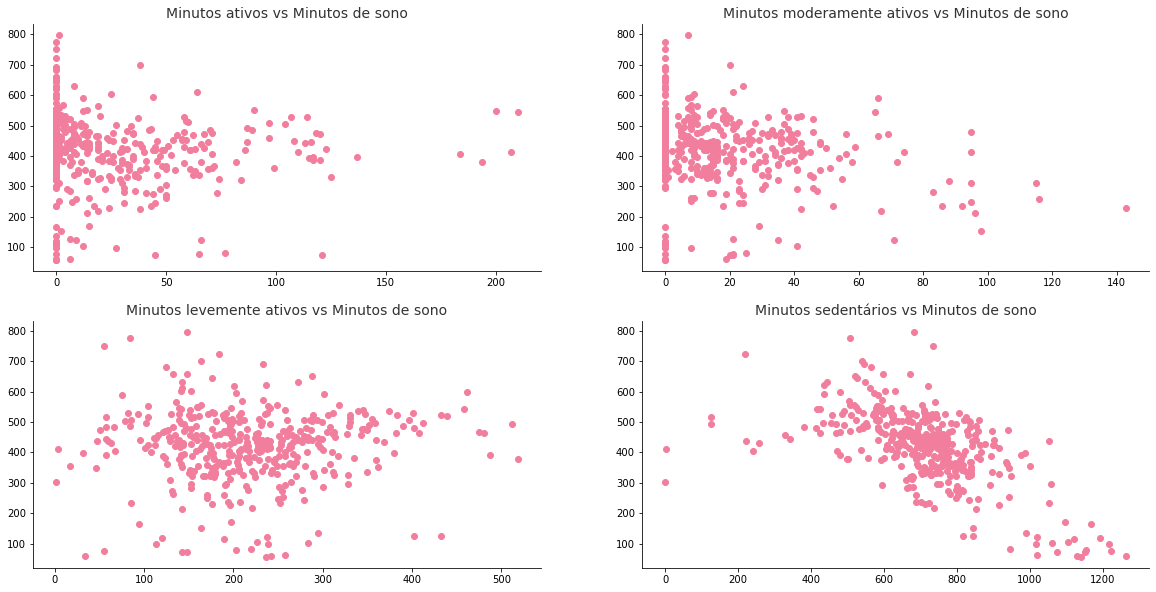

In [50]:
fig = plt.figure(figsize = (20, 10))

plt.subplot(2, 2, 1)
plt.scatter(corr['VeryActiveMinutes'], corr['TotalMinutesAsleep'], color = '#F27E9E')
plt.title('Minutos ativos vs Minutos de sono', size = 14, alpha = 0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(2, 2, 2)
plt.scatter(corr['FairlyActiveMinutes'], corr['TotalMinutesAsleep'], color = '#F27E9E')
plt.title('Minutos moderamente ativos vs Minutos de sono', size = 14, alpha = 0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(2, 2, 3)
plt.scatter(corr['LightlyActiveMinutes'], corr['TotalMinutesAsleep'], color = '#F27E9E')
plt.title('Minutos levemente ativos vs Minutos de sono', size = 14, alpha = 0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(2, 2, 4)
plt.scatter(corr['SedentaryMinutes'], corr['TotalMinutesAsleep'], color = '#F27E9E')
plt.title('Minutos sedentários vs Minutos de sono', size = 14, alpha = 0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

- Confirmando o que foi visto na matriz de correlação, pessoas que passam mais tempo sedentárias tem piores noites de sono.

# <font color='#fe8f77'>7. Act </font>


Após a análise  do dataset podemos concluir que os clientes são pessoas que tem um perfil de atividade moderada, possuindo média de 7000 passos e concentrando-se em atividades leves durante o dia. De fato, analisando os batimentos cardíacos e os minutos de atividade, chega-se à conclusão de que os clientes não costumam fazer exercícios.

A maioria da clientela utiliza o dispositivo para monitorar seus passos diários e não são pessoas focadas em atividades físicas de alto rendimento. Outra característica interessante é a quantidade de horas de utilização da pulseira: quase 20 horas por dia.

Os dados fornecidos trazem informações sobre qualidade de sono, peso, atividades diárias. Embora tudo isso seja interessante, muitas outras empresas já trazem relógios inteligentes com essas funcionalidades. A Bellabeat é uma empresa pequena e não deve ter muito poder de escalar sua produção para baratear custos e diminuir preços, e - ao menos em 2016 - era relativamente nova em um mercado que já tem grandes nomes consolidados. Assim, a melhor estratégia para garantir novos clientes é apostar na diferenciação de seu produto.

A Bellabeat é uma empresa focada em dispositivos inteligentes para mulheres. Por ter um enfoque específico, a companhia poderia focar em rastrear dados sobre ciclo menstrual e sentimentos durante o dia. O ciclo menstrual tem grande impacto sobre a disposição e saúde feminina, dessa maneira rastrear o período somado com o registro dos sentimentos e bem estar durante o dia são medidas que podem ser agregadas com a atividades físicas, noite de sono e peso podendo fazer recomendações personalizadas para o indivíduo.

Também poderia-se criar medidas de incentivo para a utilização das funcionalidades que já existem no app: o registro do peso, dos batimentos cardíacos e sono. Isso pode ser feito através de notificações e alarmes.

Como uma das missões da empresa é garantir o bem estar, poderia-se mostrar pequenos textos reafirmando o quanto é importante ter  uma meta *x* de passos e uma boa noite de sono. Esses textos poderiam ser mostrados com maior ênfase para aqueles que não cumprem as metas básicas de saúde.

Ainda com o objetivo de melhor cumprir a missão da empresa, a análise das pessoas que se caracterizam como sedentárias poderia abrir uma nova funcionalidade premium, em que essas pessoas poderiam optar por pagar uma espécie de assinatura para ter informações ainda mais detalhadas sobre como ter uma vida mais ativa.

Um dos principais problemas desta análise é que há poucos dados durante um intervalo de tempo muito curto para de fato inferir alguma coisa. Sendo assim, a medida mais urgente seria aumentar o número de observações e o período de análise. Aumentando esses dois fatores poderia-se fazer análises mais consistentes, principalmente no quesito de correlações entre as variáveis.

